# Polars

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
pl.Config.set_tbl_rows(5)
pd.options.display.max_rows = 5

## A little bit about Rust

* **Memory-safety**: strict memory management rules (ownership, borrowing, lifetimes)
* **High performance**: low-level control and optimization options
* **Static typing**: type-related errors are caught at compile time
* **Concurrency**: multithreaded programs without data races
* **Package management**: cargo tool simplifies dependency management
* **Clear syntax**: readable syntax and informative error messages

<img src = "img/cute.svg" width = 200>

## Available data structures

#### Series

In [2]:
pl.Series([1, 2, 3, 4, 5.5])

""
f64
1.0
2.0
3.0
4.0
5.5


#### DataFrames

In [3]:
pl.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6]})

a,b
i64,i64
1,4
2,5
3,6


In [4]:
pd.DataFrame([[1, 2, 3], ["aa", "b", "c"]])

,0,1,2
0,1,2,3
1,aa,b,c


In [5]:
pl.DataFrame([[1, 2, 3], ["aa", "b", "c"]])

column_0,column_1
i64,str
1,"""aa"""
2,"""b"""
3,"""c"""


## Reading data and first touch

In [6]:
cars_pd = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")
cars_pl = pl.read_csv("data/Electric_Vehicle_Population_Data.csv")

In [7]:
cars_pl

VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64
"""5UXTA6C05P""","""Yakima""","""Yakima""","""WA""",98903,2023,"""BMW""","""X5""","""Plug-in Hybrid…","""Clean Alternat…",30,0,14,227153587,"""POINT (-120.47…","""PACIFICORP""",53077002803
"""5YJRE11B48""",null,null,"""BC""",null,2008,"""TESLA""","""ROADSTER""","""Battery Electr…","""Clean Alternat…",220,98950,null,143609049,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3FMTK3SU1M""","""King""","""Kent""","""WA""",98031,2021,"""FORD""","""MUSTANG MACH-E…","""Battery Electr…","""Eligibility un…",0,0,33,186104215,"""POINT (-122.20…","""PUGET SOUND EN…",53033029206
"""1N4AZ0CP0D""","""Pierce""","""Tacoma""","""WA""",98407,2013,"""NISSAN""","""LEAF""","""Battery Electr…","""Clean Alternat…",75,0,27,153724504,"""POINT (-122.51…","""BONNEVILLE POW…",53053060500


In [8]:
cars_pl.head(1)

VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64
"""5UXTA6C05P""","""Yakima""","""Yakima""","""WA""",98903,2023,"""BMW""","""X5""","""Plug-in Hybrid…","""Clean Alternat…",30,0,14,227153587,"""POINT (-120.47…","""PACIFICORP""",53077002803


In [9]:
cars_pd.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10


In [10]:
cars_pl.describe()

describe,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,str,f64,f64,str,str,str,str,f64,f64,f64,f64,str,str,f64
"""count""","""153830""","""153830""","""153830""","""153830""",153830.0,153830.0,"""153830""","""153830""","""153830""","""153830""",153830.0,153830.0,153830.0,153830.0,"""153830""","""153830""",153830.0
"""null_count""","""0""","""3""","""3""","""0""",3.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,339.0,0.0,"""7""","""3""",3.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""75%""",null,null,null,null,98370.0,2023.0,null,null,null,null,84.0,0.0,43.0,2.41506226e8,null,null,5.3053e10
"""max""","""ZASPATDWXR""","""Yellowstone""","""Zillah""","""WY""",99577.0,2024.0,"""WHEEGO ELECTRI…","""XC90""","""Plug-in Hybrid…","""Not eligible d…",337.0,845000.0,49.0,4.79254772e8,"""POINT (-98.669…","""PUGET SOUND EN…",5.6033e10


In [11]:
cars_pd.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,153827.000000,153830.00000,153830.000000,153830.000000,153491.000000,1.538300e+05,1.538270e+05
mean,98171.496226,2020.10078,65.727673,1273.032276,29.302558,2.124161e+08,5.297335e+10
...,...,...,...,...,...,...,...
75%,98370.000000,2023.00000,84.000000,0.000000,43.000000,2.415062e+08,5.305307e+10
max,99577.000000,2024.00000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


## Missing data

Missing data formats in `polars` are `null` (applicable for all data types) and `NaN` (which is only applicable for float values).



In [12]:
null_ex = pl.DataFrame(
    {
        "a": ["abc", "acd", "ade", None],
        "b": [1.2, 4.5, 9.0, np.nan],
        "c": [3, 4, 1, None]
    }
)
null_ex

a,b,c
str,f64,i64
"""abc""",1.2,3
"""acd""",4.5,4
"""ade""",9.0,1
null,NaN,null


In [13]:
null_ex.null_count()

a,b,c
u32,u32,u32
1,0,1


In [14]:
null_ex.select(pl.col("*").is_null())

a,b,c
bool,bool,bool
false,false,false
false,false,false
false,false,false
true,false,true


In [15]:
null_ex.select(pl.col("b").is_nan())

b
bool
false
false
false
true


In [16]:
null_ex.select(pl.col("c")).mean()

c
f64
2.666667


In [17]:
null_ex.select(pl.col("b")).mean()

b
f64
NaN


## Selecting

|               | Pandas                                                                 | Polars                                                                                          |
| ------------- | ---------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Selecting** | <code>df[cols] <br> df.loc[rows, cols] <br> df.iloc[rows, cols]</code> | <code>df[rows, cols]</code> <img src="img/unsafe.svg" width="25"/> <br> <code>df.select(cols) <br> df.slice(offset, length)</code> |


In [18]:
cars_pd.loc[1997:2001, ["Model", "Electric Vehicle Type"]]

,Model,Electric Vehicle Type
1997,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
1998,MODEL 3,Battery Electric Vehicle (BEV)
1999,MODEL 3,Battery Electric Vehicle (BEV)
2000,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
2001,LEAF,Battery Electric Vehicle (BEV)


In [19]:
cars_pl.select(["Model", "Electric Vehicle Type"]).slice(1997, 5)

Model,Electric Vehicle Type
str,str
"""FUSION""","""Plug-in Hybrid…"
"""MODEL 3""","""Battery Electr…"
"""MODEL 3""","""Battery Electr…"
"""FUSION""","""Plug-in Hybrid…"
"""LEAF""","""Battery Electr…"


## Filtering

|               | Pandas                                                                 | Polars                                                                                          |
| ------------- | ---------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Filtering** | <code>df.loc[condition]</code> | <code>df.filter(condition)</code> |

In [20]:
cars_pd.loc[cars_pd["Model Year"] == 2023, ["Make", "Model", "Model Year"]] 

,Make,Model,Model Year
0,BMW,X5,2023
17,TESLA,MODEL Y,2023
...,...,...,...
153819,CHEVROLET,BOLT EUV,2023
153827,CHEVROLET,BOLT EV,2023


In [21]:
cars_pl.filter(pl.col("Model Year") == 2023).select(["Make", "Model", "Model Year"]) 

Make,Model,Model Year
str,str,i64
"""BMW""","""X5""",2023
"""TESLA""","""MODEL Y""",2023
…,…,…
"""CHEVROLET""","""BOLT EUV""",2023
"""CHEVROLET""","""BOLT EV""",2023


## Assigning

|               | Pandas                                                                 | Polars                                                                                          |
| ------------- | ---------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Assigning** | <code>df.loc[condition, col] = val <br> df.assign(col = df[col].mask(condition, value))</code> | <code>df.with_columns(pl.when(condition).then(val1).otherwise(val2))</code> <img src="img/happy.svg" width="25"/> |

In [22]:
cars_pd[cars_pd["Make"] == "TESLA"]["Electric Range"] = cars_pd["Electric Range"] - 10
cars_pd

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153828,3FMTK3SU1M,King,Kent,WA,98031.0,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
153829,1N4AZ0CP0D,Pierce,Tacoma,WA,98407.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,27.0,153724504,POINT (-122.5113356 47.2923828),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10


In [23]:
cars_pd.loc[cars_pd["Make"] == "TESLA", "Electric Range"] = cars_pd["Electric Range"] - 10
cars_pd

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,98950,NaN,143609049,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153828,3FMTK3SU1M,King,Kent,WA,98031.0,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
153829,1N4AZ0CP0D,Pierce,Tacoma,WA,98407.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,27.0,153724504,POINT (-122.5113356 47.2923828),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10


In [24]:
cars_pd.assign(**{"Electric Range": cars_pd["Electric Range"].mask(cars_pd["Make"] == "TESLA", cars_pd["Electric Range"] - 10)})

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,98950,NaN,143609049,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153828,3FMTK3SU1M,King,Kent,WA,98031.0,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
153829,1N4AZ0CP0D,Pierce,Tacoma,WA,98407.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,27.0,153724504,POINT (-122.5113356 47.2923828),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10


In [25]:
cars_pl.with_columns(
    pl.when(pl.col("Make") == "TESLA")
    .then(pl.col("Electric Range") - 10)
    .otherwise(pl.col("Electric Range"))
)

VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64
"""5UXTA6C05P""","""Yakima""","""Yakima""","""WA""",98903,2023,"""BMW""","""X5""","""Plug-in Hybrid…","""Clean Alternat…",30,0,14,227153587,"""POINT (-120.47…","""PACIFICORP""",53077002803
"""5YJRE11B48""",null,null,"""BC""",null,2008,"""TESLA""","""ROADSTER""","""Battery Electr…","""Clean Alternat…",210,98950,null,143609049,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3FMTK3SU1M""","""King""","""Kent""","""WA""",98031,2021,"""FORD""","""MUSTANG MACH-E…","""Battery Electr…","""Eligibility un…",0,0,33,186104215,"""POINT (-122.20…","""PUGET SOUND EN…",53033029206
"""1N4AZ0CP0D""","""Pierce""","""Tacoma""","""WA""",98407,2013,"""NISSAN""","""LEAF""","""Battery Electr…","""Clean Alternat…",75,0,27,153724504,"""POINT (-122.51…","""BONNEVILLE POW…",53053060500


<h2>Zadanie 1</h2>

Stwórz kolumnę Model Year Assessment, w której zapiszesz
* "Brand new", jeśli Model Year >= 2020,
* "New", jeśli 2020 > Model Year >= 2015,
* "Not that new", jeśli Model Year < 2015.

## Grouping

|               | Pandas                                                                             | Polars                                              |
| ------------- | ---------------------------------------------------------------------------------- | --------------------------------------------------- |
| **Grouping**  | <code>df.groupby(col).function <br> df.groupby(col).agg({col: function}) </code>   | <code>df.group_by(col).agg(col.function)</code>     |

In [26]:
cars_pd.groupby("Electric Vehicle Type").agg({"Electric Range": "mean"})

,Electric Range
Electric Vehicle Type,
Battery Electric Vehicle (BEV),70.006365
Plug-in Hybrid Electric Vehicle (PHEV),30.678922


In [27]:
cars_pd.groupby("Electric Vehicle Type")["Electric Range"].mean()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            70.006365
Plug-in Hybrid Electric Vehicle (PHEV)    30.678922
Name: Electric Range, dtype: float64

In [28]:
cars_grouped_pl = cars_pl.group_by("Electric Vehicle Type").agg([pl.col("Electric Range").mean(), pl.col("Make").unique()])
cars_grouped_pl

Electric Vehicle Type,Electric Range,Make
str,f64,list[str]
"""Plug-in Hybrid…",30.678922,"[""HYUNDAI"", ""LINCOLN"", … ""PORSCHE""]"
"""Battery Electr…",75.83579,"[""RIVIAN"", ""VOLVO"", … ""TOYOTA""]"


In [29]:
cars_grouped_pl.explode("Make")

Electric Vehicle Type,Electric Range,Make
str,f64,str
"""Plug-in Hybrid…",30.678922,"""HYUNDAI"""
"""Plug-in Hybrid…",30.678922,"""LINCOLN"""
…,…,…
"""Battery Electr…",75.83579,"""BMW"""
"""Battery Electr…",75.83579,"""TOYOTA"""


<h2>Zadanie 2</h2>

Znajdź marki samochodów, dla których średni zasięg elektryczny jest większy niż 50. Posortuj je malejąco ze względu na tę wartość.

## Using SQL

SQL queries are executed lazily.

In [30]:
sql_ctx = pl.SQLContext(cars=cars_pl)

In [31]:
query = """SELECT * FROM cars
           WHERE "Model Year" = 2023
           ORDER BY "Electric Range" DESC
           LIMIT 3
           """
sql_ctx.execute(query, eager=True)
# sql_ctx.execute(query).collect()

VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64
"""SALKP9F4XP""","""King""","""Seattle""","""WA""",98112,2023,"""LAND ROVER""","""RANGE ROVER""","""Plug-in Hybrid…","""Clean Alternat…",51,0,43,238061995,"""POINT (-122.30…","""CITY OF SEATTL…",53033006300
"""SALKP9F40P""","""Chelan""","""Wenatchee""","""WA""",98801,2023,"""LAND ROVER""","""RANGE ROVER""","""Plug-in Hybrid…","""Clean Alternat…",51,0,12,240695801,"""POINT (-120.32…","""PUD NO 1 OF CH…",53007961102
"""SALKP9F44P""","""King""","""Issaquah""","""WA""",98029,2023,"""LAND ROVER""","""RANGE ROVER""","""Plug-in Hybrid…","""Clean Alternat…",51,0,5,228739325,"""POINT (-121.99…","""PUGET SOUND EN…",53033032221


## Transformations

### Pivots

In [32]:
cars_pl.select("Make", "County", "Electric Range")

Make,County,Electric Range
str,str,i64
"""BMW""","""Yakima""",30
"""TESLA""",null,220
…,…,…
"""FORD""","""King""",0
"""NISSAN""","""Pierce""",75


In [33]:
cars_pl.pivot(index = "Make", columns = "County", values = "Electric Range", aggregate_function = "mean")

Make,Yakima,null,King,Island,Kitsap,Snohomish,Thurston,Clark,Whitman,Allen,Grant,Stevens,Chelan,Walla Walla,Spokane,Kittitas,Pierce,Skagit,Douglas,Cowlitz,Clallam,Jefferson,Lewis,Benton,Whatcom,Klickitat,Pend Oreille,Mason,Ferry,Rockingham,Skamania,Grays Harbor,Franklin,San Juan,Stafford,Okanogan,…,Meade,Beaufort,Elmore,St. Louis,Oldham,Goochland,Richland,Lake,Loudoun,Sarasota,Platte,Calvert,Hoke,Philadelphia,DeKalb,Polk,Wichita,Yellowstone,Onslow,Sedgwick,Carroll,New Haven,Santa Cruz,Henrico,Vernon,Ray,Santa Barbara,Sheridan,Mobile,Kauai,Houston,Leavenworth,Harford,Williamsburg,Harrison,Kent,Hawaii
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""BMW""",29.266667,null,36.850051,48.396226,49.959091,33.380368,38.78,37.428177,46.571429,null,36.909091,76.4,28.148148,34.8125,33.285714,31.3,36.127451,41.517241,21.5,37.653846,52.68,66.076923,37.866667,30.939024,47.135417,84.5,48.5,31.555556,72.0,null,47.5,45.631579,30.333333,54.733333,null,51.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,null,null,null,14.0,null,null,null,null,null
"""TESLA""",95.538667,220.0,86.147293,111.938843,98.682304,74.652657,92.240069,87.989663,67.931373,210.0,108.506912,87.225352,108.493639,98.315385,91.626539,105.717842,88.778293,101.920398,107.485075,107.415541,90.304878,120.014019,117.944444,105.74443,104.230172,87.144444,134.823529,116.193676,105.875,308.0,99.644068,113.013158,103.099174,129.033816,73.333333,100.216216,…,null,0.0,0.0,322.0,null,null,null,215.0,0.0,220.0,145.5,null,0.0,0.0,null,null,207.5,null,null,0.0,null,null,215.0,null,0.0,null,0.0,null,null,null,215.0,null,null,null,0.0,0.0,208.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TH!NK""",null,null,100.0,null,null,null,null,100.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,100.0,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""BENTLEY""",null,null,null,null,null,17.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


### Melts

In [34]:
cars_pl.melt(id_vars = ["Make", "Model"], value_vars = ["State", "Postal Code"])

Make,Model,variable,value
str,str,str,str
"""BMW""","""X5""","""State""","""WA"""
"""TESLA""","""ROADSTER""","""State""","""BC"""
…,…,…,…
"""FORD""","""MUSTANG MACH-E…","""Postal Code""","""98031"""
"""NISSAN""","""LEAF""","""Postal Code""","""98407"""


<h2>Plots</h2>

In [35]:
mean_range_pd = cars_pd.groupby("Model Year")["Electric Range"].mean()

In [36]:
mean_range_pl = cars_pl.group_by("Model Year").agg(pl.col("Electric Range").mean())
mean_range_pl

Model Year,Electric Range
i64,f64
2014,80.844451
2002,95.0
…,…
2010,226.875
2013,80.382735


<Axes: xlabel='Model Year'>

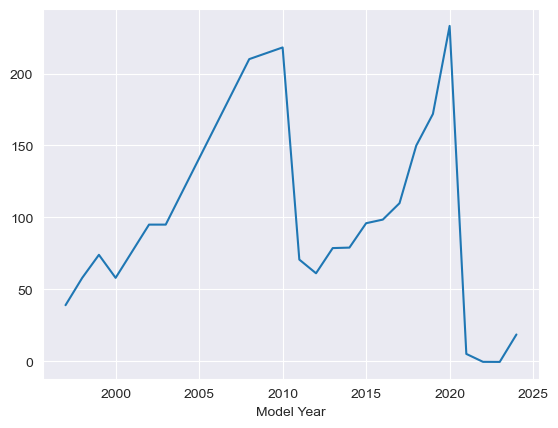

In [37]:
mean_range_pd.plot()

<Axes: xlabel='Model Year', ylabel='Electric Range'>

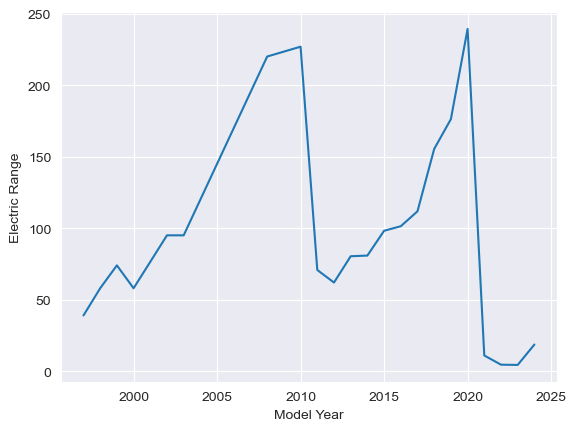

In [38]:
sns.lineplot(data = mean_range_pl, x = "Model Year", y = "Electric Range")

<h2>LazyFrames</h2>

Lazy execution means that an expression is evaluated not immediately, but only when needed. In contrast, eager execution evaluates the expression immediately.

### Reading

In [46]:
%%timeit
df_lazy = pl.scan_parquet("data/random.parquet")

1.18 ms ± 44.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [47]:
%%timeit
df_pl = pl.read_parquet("data/random.parquet")

695 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
%%timeit
df_pd = pd.read_parquet("data/random.parquet")

1.24 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Filtering

In [51]:
%%timeit
df_lazy.filter(pl.col("A") > 90).collect()

839 ms ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%%timeit
df_pl.filter(pl.col("A") > 90)

219 ms ± 9.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%%timeit
df_pd[df_pd["A"] > 90]

481 ms ± 37.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Grouping

In [70]:
%%timeit
df_lazy.group_by(pl.col("X")).agg(pl.col("A").mean(), pl.col("B").max(), pl.col("C").median()).collect()

1.07 s ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
%%timeit
df_pl.group_by(pl.col("X")).agg(pl.col("A").mean(), pl.col("B").max(), pl.col("C").median())

428 ms ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%%timeit
df_pd.groupby("X").agg({"A": "mean", "B": "max", "C": "median"})

1.29 s ± 48.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### String manipulations

In [89]:
%%timeit
cars_pl.lazy().with_columns((pl.col("Make").str.slice(0, 1) + pl.col("Model").str.slice(-1, 1)).alias("Abbreviation")).collect()

15.4 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [90]:
%%timeit
cars_pl.with_columns((pl.col("Make").str.slice(0, 1) + pl.col("Model").str.slice(-1, 1)).alias("Abbreviation"))

15.4 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [100]:
%%timeit
cars_pd.assign(Abbreviation = cars_pd["Make"].str[0] + cars_pd["Model"].str[-1])

392 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
